# Inflow Performance Relationship (IPR)

## Darcy's Method

In [21]:
import psapy.Vogel as IPR
import psapy.FluidProps as FluidProps
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d
import numpy as np
sns.set(color_codes=True)

Input data

In [11]:
Pressure=4000.0
Thickness=75.0
k= 50.0
visc = 0.5
GasGrav=0.65
API= 28.0
GOR= 375.0
Temp=150.0
rw=0.328
re=1053.0
s=-1.5
OilFVF = 1.2

In [12]:
Psat = FluidProps.Pbub(Temp,75,100,GasGrav, API, GOR)
Psat

2370.202357201929

In [13]:
# def Darcy_IPR(k,h,visc, re,rw, s, P, OilFVF, nPoints):
print(IPR.Darcy_IPR.__doc__)
nPoints= 10

IPR_darcy= IPR.Darcy_IPR(k,Thickness,visc, re,rw, s, Pressure, OilFVF, nPoints)

Function to calculate IPR using Darcy's Equation.  It returns a list with a pair of Pressure and rates


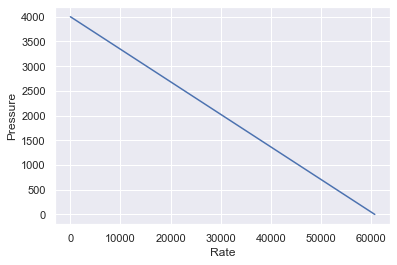

In [14]:
scatter =sns.lineplot(IPR_darcy[0], IPR_darcy[1])
plt.xlabel('Rate')
plt.ylabel('Pressure');


# Vogel's Method

In [19]:
#def VogelIPR(P, Pb, Pwf, Qo, nPoints):

Qo = 500
Pb =2370
P = 2370
Pwf = 2000
nPoints =10

IPR_vogel= IPR.VogelIPR(P, Pb, Pwf, Qo, nPoints)

[[0, 328.853836203962, 627.1166178773232, 894.7883450200835, 1131.8690176322425, 1338.3586357138, 1514.2571992647565, 1659.5647082851121, 1774.2811627748663, 1858.4065627340194, 1911.9409081625715], [2370, 2133.0, 1896.0, 1659.0, 1422.0, 1185.0, 948.0, 711.0, 474.0, 237.0, 0.0]]


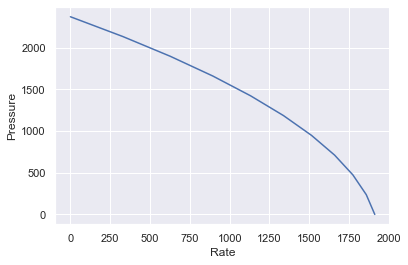

In [20]:
scatter =sns.lineplot(x=IPR_vogel[0], y=IPR_vogel[1], markers = True)
plt.ylabel("Pressure");
plt.xlabel("Rate");


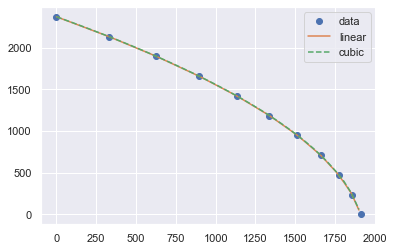

In [24]:
x=IPR_vogel[0]
y=IPR_vogel[1]
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')
xnew = np.linspace(0.1, 1900, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

# Vogel combined with Darcy

In [73]:
#def Vogel_DarcyIPR(P, k,h,visc, re,rw, s, OilFVF,Temp, Pb, nPoints):

IPR_comb = IPR.Vogel_DarcyIPR(Pressure, k,Thickness ,visc, re,rw, s, OilFVF,Temp, Pb, nPoints)


3992.0
3984.0
3976.0
3968.0
3960.0
3952.0
3944.0
3936.0
3928.0
3920.0
3912.0
3904.0
3896.0
3888.0
3880.0
3872.0
3864.0
3856.0
3848.0
3840.0
3832.0
3824.0
3816.0
3808.0
3800.0
3792.0
3784.0
3776.0
3768.0
3760.0
3752.0
3744.0
3736.0
3728.0
3720.0
3712.0
3704.0
3696.0
3688.0
3680.0
3672.0
3664.0
3656.0
3648.0
3640.0
3632.0
3624.0
3616.0
3608.0
3600.0
3592.0
3584.0
3576.0
3568.0
3560.0
3552.0
3544.0
3536.0
3528.0
3520.0
3512.0
3504.0
3496.0
3488.0
3480.0
3472.0
3464.0
3456.0
3448.0
3440.0
3432.0
3424.0
3416.0
3408.0
3400.0
3392.0
3384.0
3376.0
3368.0
3360.0
3352.0
3344.0
3336.0
3328.0
3320.0
3312.0
3304.0
3296.0
3288.0
3280.0
3272.0
3264.0
3256.0
3248.0
3240.0
3232.0
3224.0
3216.0
3208.0
3200.0
3192.0
3184.0
3176.0
3168.0
3160.0
3152.0
3144.0
3136.0
3128.0
3120.0
3112.0
3104.0
3096.0
3088.0
3080.0
3072.0
3064.0
3056.0
3048.0
3040.0
3032.0
3024.0
3016.0
3008.0
3000.0
2992.0
2984.0
2976.0
2968.0
2960.0
2952.0
2944.0
2936.0
2928.0
2920.0
2912.0
2904.0
2896.0
2888.0
2880.0
2872.0
2864.0
2856.0

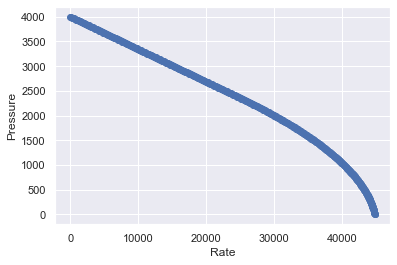

In [74]:
scatter =plt.scatter(IPR_comb[0], IPR_comb[1])
plt.xlabel('Rate')
plt.ylabel('Pressure')
plt.show()